In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('data/train_set/train_set.csv', sep='\t', nrows=50000)

In [3]:
train_df.shape

(50000, 2)

In [4]:
train_df.columns

Index(['label', 'text'], dtype='object')

In [5]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [6]:
train_df.tail()

,label,text
49995,3,5264 580 5466 498 803 382 1635 7078 1569 641 2...
49996,6,2555 3648 3530 2555 2923 913 2109 4139 6104 75...
49997,2,7495 2435 211 913 3154 101 6405 4858 4321 1913...
49998,10,3523 6637 7543 6930 4409 6286 4751 531 2367 24...
49999,8,408 671 3836 6511 5288 3800 299 648 2400 4411 ...


In [7]:
train_df['text_len']= train_df['text'].apply(lambda x : len(x.split(' ')))

Text(0.5, 1.0, 'Histogram of char count')

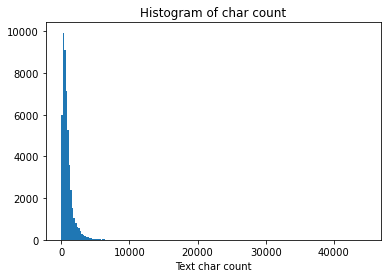

In [8]:
import matplotlib.pyplot as plt

_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 0, 'category')

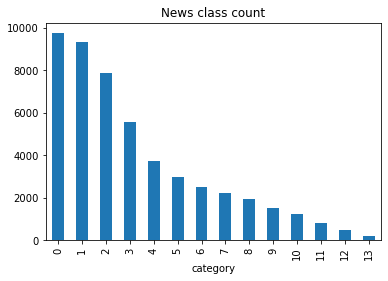

In [9]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数

In [10]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))

print(word_count[0])

print(word_count[-1])

6180
('3750', 1863795)
('1766', 1)


根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

In [11]:
from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])

print(word_count[1])

print(word_count[2])

('3750', 49504)
('900', 49433)
('648', 47998)


**使用Bag of Words也即CountVectors模型**

每个文档的字/词可以使用其出现次数来进行表示。直接统计每个字出现的次数，并进行赋值。
在sklearn中可以直接CountVectorizer来实现这一步骤。

In [12]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

# train_df = pd.read_csv('../data/train_set.csv', sep='\t', nrows=15000)

vectorizer = CountVectorizer(max_features=10000)
train_test = vectorizer.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:40000], train_df['label'].values[:40000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))

0.8610580967085018


使用**TF-IDF模型**

TfidfTransformer + CountVectorizer  =  TfidfVectorizer

- Term Frequency: 能够降低长文本造成的bias
- Inverse Document Frequency: 降低常用词造成的Bias
- TF-IDF: 辨别在document中最重要的token，删除不重要的token；或者用在数据预处理上，可以使维度下降

In [27]:
?TfidfVectorizer

In [13]:
# TF-IDF +  RidgeClassifier

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

# train_df = pd.read_csv('../data/train_set.csv', sep='\t', nrows=15000)

tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
train_test = tfidf.fit_transform(train_df['text'])


clf = RidgeClassifier()
clf.fit(train_test[:40000], train_df['label'].values[:40000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))
# 0.87

0.9385075154677592


In [14]:
test = pd.read_csv('./data/test_a/test_a.csv', sep='\t')

In [22]:
test.head()+ test.tail()

,text
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
49995,NaN
49996,NaN
49997,NaN
49998,NaN
49999,NaN


In [19]:
test_text =tfidf.fit_transform(test['text'])

In [20]:
preds = clf.predict(test_text)

In [25]:
preds

array([ 1, 10,  8, ...,  1,  2,  2], dtype=int64)

In [26]:
df_submit = pd.read_csv('data/test_a_sample_submit.csv')
df_submit['label'] = preds
df_submit.to_csv('result/submit724.csv', index=None)